# SKE - clinical analysis

This project is used for a reliability analysis project.

## Data analysis and description

First, we will look at the data, describe the characteristics, filter the dataset to get only the subdata that are of interest. The aim of the analysis is to decide whether there is a difference between survival times for patients treated with a new drug or placebo. All of the patients have the same cell type `cell = 1` (squamous).

In [285]:
import pandas as pd
import os

data = pd.read_csv("..\\data\\clinic_trial.csv", sep=";")
data.head()

,treat,cell,survt,cens,KAR,didur,age,prith
0,1,1,72,0,60,7,69,0
1,1,1,411,1,70,5,64,10
2,1,1,228,1,60,3,38,0
3,1,1,126,1,60,9,63,10
4,1,1,118,1,70,11,65,10


First, let's describe the full dataset and look at the set characteristics like mean values etc.

In [286]:
# data characteristics
data.describe().round(2)

,treat,cell,survt,cens,KAR,didur,age,prith
count,137,137,137,137,137,137,137,137
mean,1.5,2.34,121.63,0.74,58.57,8.77,58.31,2.92
std,0.5,1.07,157.82,0.44,20.04,10.61,10.54,4.56
min,1,1,1,0,10,1,34,0
25%,1,1,25,0,40,3,51,0
50%,1,2,80,1,60,5,62,0
75%,2,3,144,1,75,11,66,10
max,2,4,999,1,99,87,81,10


Now we can filzer the data to only get subgroup of interest and look at the data. There is a slight difference between the characteristics.

In [287]:
# the subgroup of interest
group = data.query('cell==1')
group.describe().round(2)

,treat,cell,survt,cens,KAR,didur,age,prith
count,35,35,35,35,35,35,35,35
mean,1.57,1,200.2,0.74,60.86,11.03,58.46,4
std,0.5,0,248.23,0.44,20.49,11.53,10.37,4.97
min,1,1,1,0,20,1,35,0
25%,1,1,31.5,0.5,50,4,51.5,0
50%,2,1,111,1,60,7,62,0
75%,2,1,262.5,1,75,12.5,64.5,10
max,2,1,999,1,90,58,81,10


In [372]:
group.query('cens==1').describe().round(2)

,treat,cell,survt,cens,KAR,didur,age,prith
count,26,26,26,26,26,26,26,26
mean,1.58,1,221.81,1,58.46,9.92,58.08,4.23
std,0.5,0,278.39,0,19.94,11.05,11.05,5.04
min,1,1,1,1,20,1,35,0
25%,1,1,30.75,1,50,4,50.25,0
50%,2,1,115,1,60,7,62.5,0
75%,2,1,306.25,1,70,11.75,64,10
max,2,1,999,1,90,58,81,10


In [567]:
group.query('cens==0').describe().round(2)

,treat,cell,survt,cens,KAR,didur,age,prith
count,9,9,9,9,9,9,9,9
mean,1.56,1,137.78,0,67.78,14.22,59.56,3.33
std,0.53,0,117.44,0,21.67,12.96,8.6,5
min,1,1,25,0,20,2,48,0
25%,1,1,72,0,60,6,52,0
50%,2,1,100,0,80,8,62,0
75%,2,1,201,0,80,28,68,10
max,2,1,389,0,90,36,70,10


Let's describe the data and use some visualization to figure out what we are dealing with. The first plot is a boxplot of our data. Surprisingly, we can see that patients with placebo seem to have higher survival times then patients treated with the drug.

Text(0.5, 1.0, '')

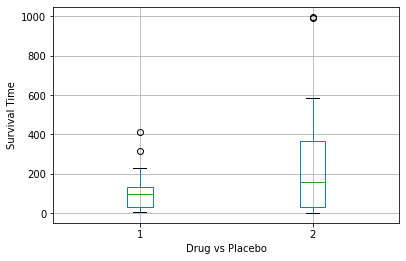

In [374]:
import matplotlib.pyplot as plt

group.boxplot(column='survt', by='treat')
plt.xlabel('Drug vs Placebo')
plt.ylabel('Survival Time')
plt.suptitle('')
plt.title('')

However, we should have in mind that we are working with censored data. This means that we should be careful about any conclusions simply from the boxplot above. Let's look only at the uncensored data for a bit. The data we have is fairly unbalanced when we look at the dataframe. There are 26 datapoints from 35, meaning that 9 datapoints are censored.

In [289]:
uncensored = group.query('cens==1')
uncensored.describe().round(2)

,treat,cell,survt,cens,KAR,didur,age,prith
count,26,26,26,26,26,26,26,26
mean,1.58,1,221.81,1,58.46,9.92,58.08,4.23
std,0.5,0,278.39,0,19.94,11.05,11.05,5.04
min,1,1,1,1,20,1,35,0
25%,1,1,30.75,1,50,4,50.25,0
50%,2,1,115,1,60,7,62.5,0
75%,2,1,306.25,1,70,11.75,64,10
max,2,1,999,1,90,58,81,10


Now, we can look at the boxplot and see if it changes from the previous one.

Text(0.5, 1.0, '')

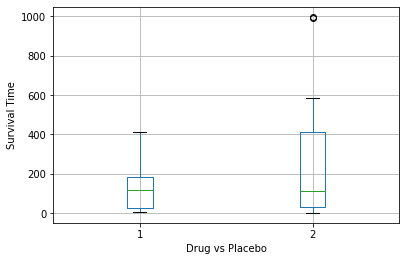

In [375]:
uncensored.boxplot(column='survt', by='treat')
plt.xlabel('Drug vs Placebo')
plt.ylabel('Survival Time')
plt.suptitle('')
plt.title('')

In [376]:
uncensored.query('survt>900')

,treat,cell,survt,cens,KAR,didur,age,prith
69,2,1,999,1,90,12,54,10
74,2,1,991,1,70,7,50,10


We can see that the median values are fairly similar, but the boxplot for placebo has higher variation and some outliers at the top of the plot.

# Task A

The first task is to use both parametric and non-parametric methods for censored data and estimate the best reliability model for survival time. The data is to be divided into two groups
- patients treated with a drug
- patients with placebo.

## Parametric methods

First, we will use parametric methods and try to fit our data to known distributions such as Pareto or Weibull distribution. For this we can use the Python package `reliability`, especially the ability to "Fit Everything".

### Patients treated with a drug

In [291]:
# data for pacients treated with the drug and placebo
drug = group.query('treat==1')
placebo = group.query('treat==2')

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 11/4 (26.66667% right censored) 

  Distribution   Alpha     Beta  Gamma      Mu   Sigma     Lambda  Log-likelihood    AICc     BIC      AD
      Gamma_3P 472.047 0.398773 7.9999                                   -60.6653 129.512 129.455 2.39134
    Weibull_3P 175.656 0.504772 7.9999                                    -62.179  132.54 132.482 2.20771
Exponential_1P                                         0.00610772        -67.0802 136.468 136.868 2.04315
Loglogistic_3P 111.778 0.543644 7.9999                                   -64.4227 137.027  136.97 2.38261
Exponential_2P                  7.9999                 0.00654373        -66.3217 137.643  138.06 2.58292
    Weibull_2P 163.803  1.03288                                          -67.0711 139.142 139.558 2.06295
      Gamma_2P 164.676 0.995015                                          -67.0801  139.16 139.576 2.04177
  Lognormal_3P                  7.9999 4.

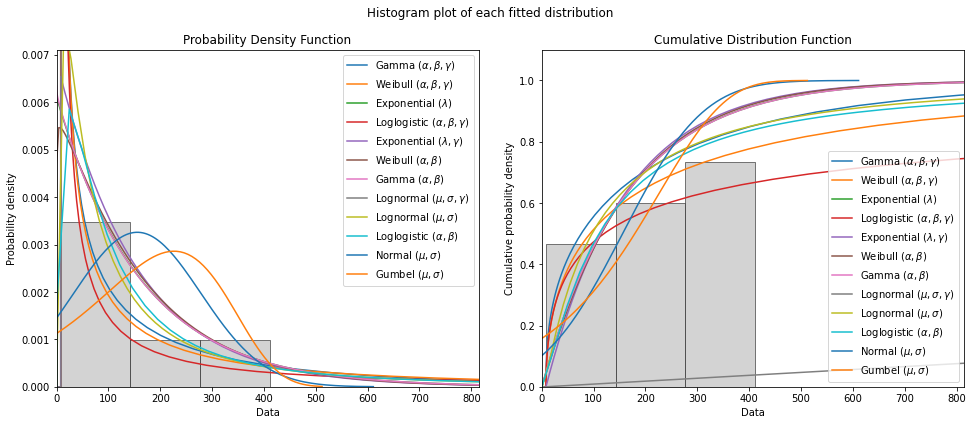

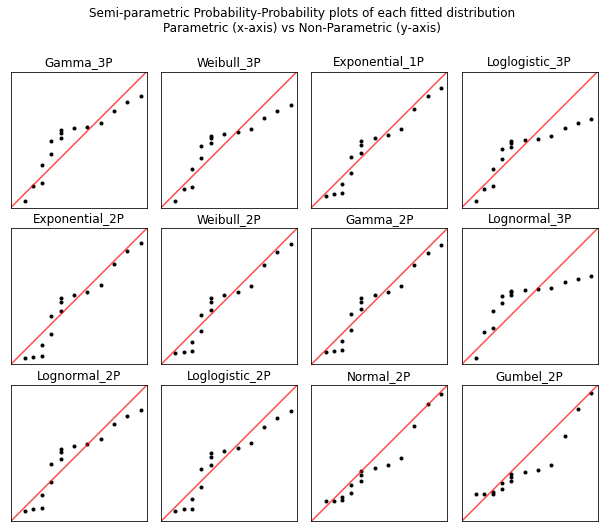

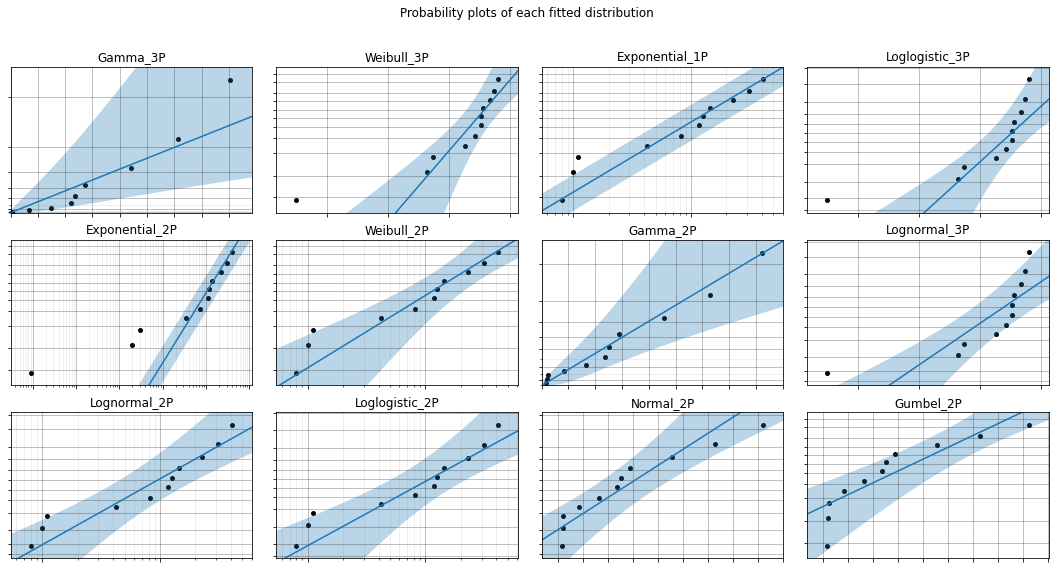

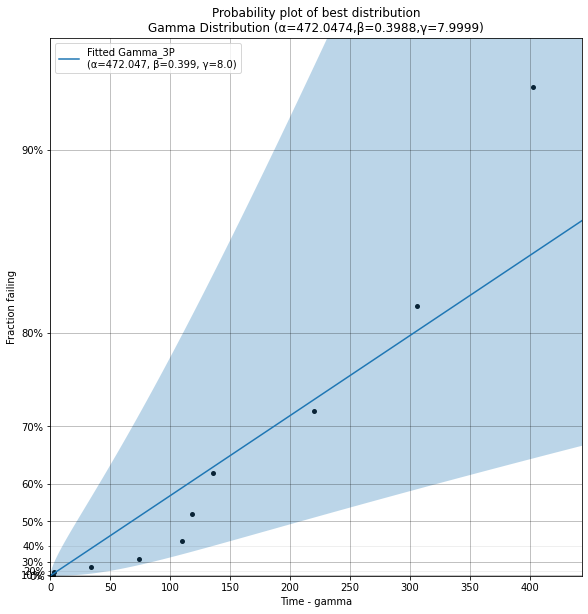

The best fitting distribution was Gamma_3P which had parameters [4.72047448e+02 3.98772983e-01 7.99990000e+00]


In [292]:
#import numpy as np

from reliability.Fitters import Fit_Everything
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import make_right_censored_data

results_drug = Fit_Everything(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values)
print('The best fitting distribution was', results_drug.best_distribution_name, 'which had parameters', results_drug.best_distribution.parameters)

The output of this function is thorough. The best chosen distribution is the Exponential distribution.

We can visually inspect the results. It seems that the Exponential distribution and 2-parametric Weibull distribution best approximate the data based on the points' distance from the linear quantile line. The Weibull distribution has larger confidence intervals which account for more variability in the datapoints.

Results from Fit_Exponential_1P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Failures / Right censored: 11/4 (26.66667% right censored) 

Parameter  Point Estimate  Standard Error   Lower CI  Upper CI
   Lambda      0.00610772      0.00184155 0.00338246 0.0110287
 1/Lambda         163.727         49.3656    90.6722   295.643 

Goodness of fit    Value
 Log-likelihood -67.0802
           AICc  136.468
            BIC  136.868
             AD  2.04315 

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Failures / Right censored: 11/4 (26.66667% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         163.803         47.8943   92.3507   290.539
     Beta         1.03288        0.246203   0.64737   1.64796 

Goodness of fit    Value
 Log-likelihood -67.0711
           AICc  139.142
            BIC  139.558
             AD  2.06295 



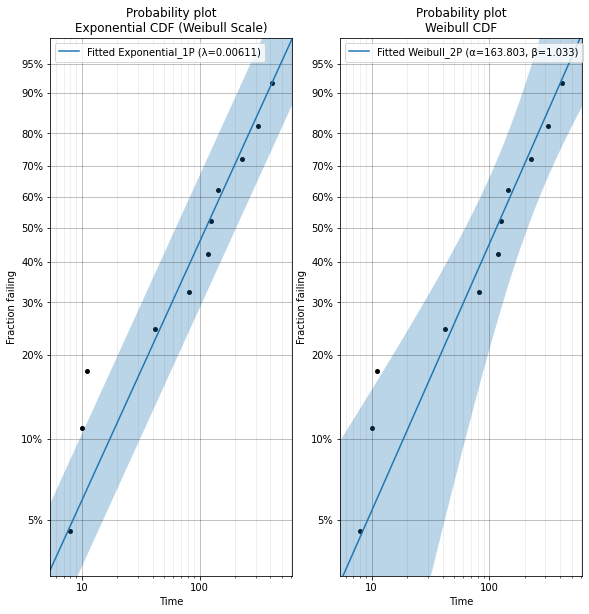

In [293]:
from reliability.Fitters import Fit_Weibull_2P
from reliability.Fitters import Fit_Exponential_1P
from reliability.Other_functions import make_right_censored_data, histogram

plt.figure(figsize=(10,5))
plt.subplot(121)
drug_pm_E = Fit_Exponential_1P(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values)
plt.subplot(122)
drug_pm_W = Fit_Weibull_2P(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values)

Let's see how the two chosen distribution fit to data and non-parametric estimates.

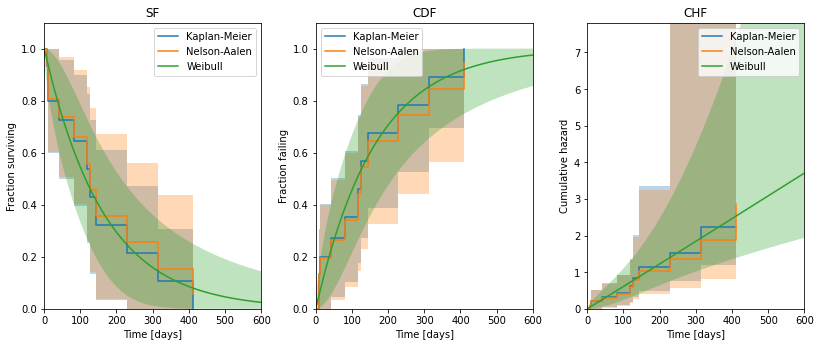

In [378]:
from reliability.Nonparametric import KaplanMeier, NelsonAalen

plt.figure(figsize=(12, 5))
plt.subplot(131)
KaplanMeier(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, plot_type='SF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, label='Nelson-Aalen', print_results=False, plot_type='SF')
dist_W.SF(label='Weibull')
plt.xlim(0,600)
plt.xlabel('Time [days]')
plt.legend()
plt.title('SF')
plt.subplot(132)
KaplanMeier(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, plot_type='CDF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, label='Nelson-Aalen', print_results=False, plot_type='CDF')
dist_W.CDF(label='Weibull')
plt.xlim(0,600)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CDF')
plt.subplot(133)
KaplanMeier(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, plot_type='CHF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, label='Nelson-Aalen', print_results=False, plot_type='CHF')
dist_W.CHF(label='Weibull')
plt.xlim(0,600)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CHF')
plt.subplots_adjust(left=0.07, right=0.95, top=0.92, wspace=0.25)  # format the plot layout
plt.show()

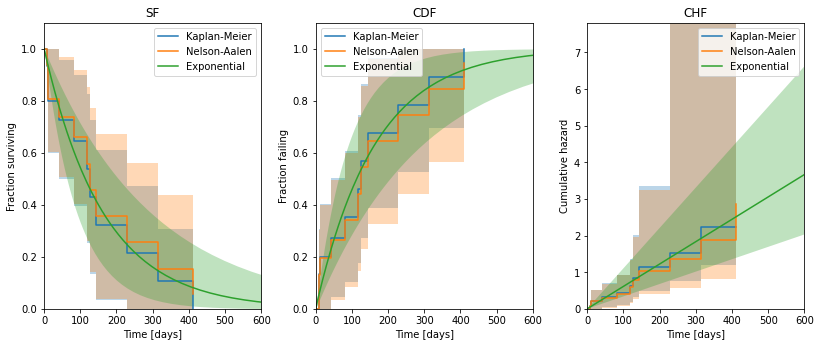

In [379]:
plt.figure(figsize=(12, 5))
plt.subplot(131)
KaplanMeier(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, plot_type='SF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, label='Nelson-Aalen', print_results=False, plot_type='SF')
dist_E.SF(label='Exponential')
plt.xlim(0,600)
plt.xlabel('Time [days]')
plt.legend()
plt.title('SF')
plt.subplot(132)
KaplanMeier(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, plot_type='CDF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, label='Nelson-Aalen', print_results=False, plot_type='CDF')
dist_E.CDF(label='Exponential')
plt.xlim(0,600)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CDF')
plt.subplot(133)
KaplanMeier(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, plot_type='CHF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, label='Nelson-Aalen', print_results=False, plot_type='CHF')
dist_E.CHF(label='Exponential')
plt.xlim(0,600)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CHF')
plt.subplots_adjust(left=0.07, right=0.95, top=0.92, wspace=0.25)  # format the plot layout
plt.show()

Both distributions seem to estimate well. Since the general rule is to go with the easiest explanation, we will choose Exponential model for the patients theated with a drug.

### Placebo patients

Here, we will try to find the best parametric model for patients given placebo treatment. Again, we can use the Fit All function and look at the results.

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 15/5 (25% right censored) 

  Distribution   Alpha     Beta  Gamma      Mu   Sigma     Lambda  Log-likelihood    AICc     BIC      AD
    Weibull_3P 319.905 0.411446 0.9999                                   -91.9026 191.305 192.792 2.50868
      Gamma_3P 898.814 0.679065 0.9999                                   -95.6301  198.76 200.247 2.75927
  Lognormal_3P                  0.9999 4.63039 5.27832                   -97.3383 202.177 203.664 3.28785
      Gamma_2P 676.421 0.568223                                          -100.373 205.451 206.737 1.93716
    Weibull_2P 342.529 0.682327                                          -100.835 206.375 207.661 1.87121
Exponential_1P                                          0.0028876        -102.743 207.708 208.481 2.66812
Loglogistic_2P 180.325 0.815238                                          -102.595 209.896 211.182 1.92303
Exponential_2P                  0.9999         

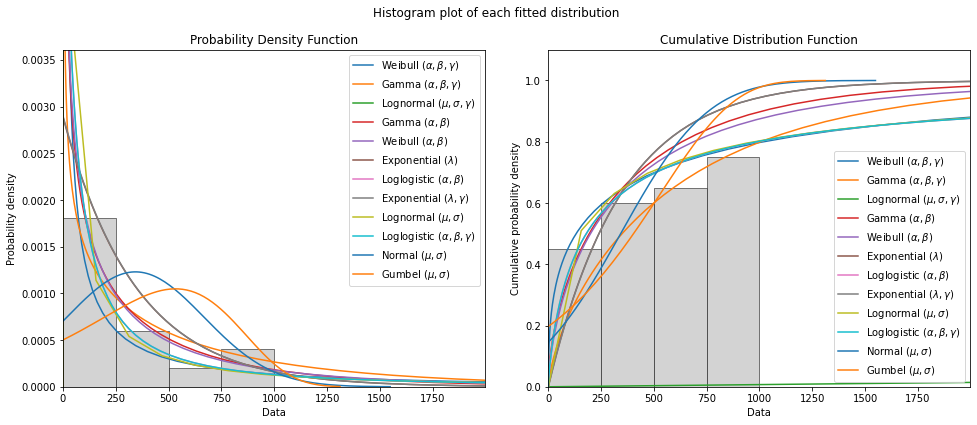

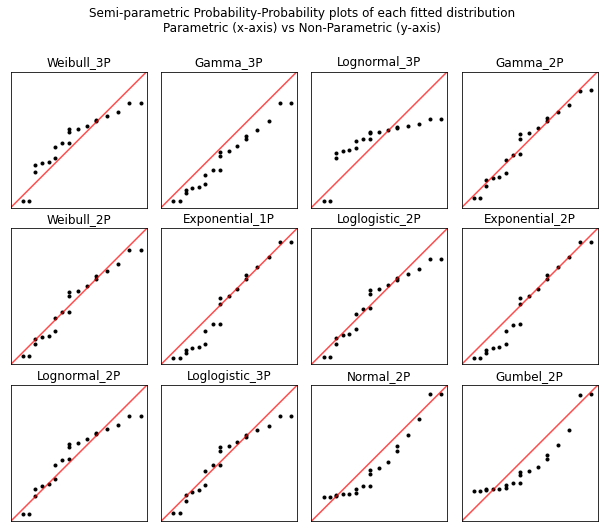

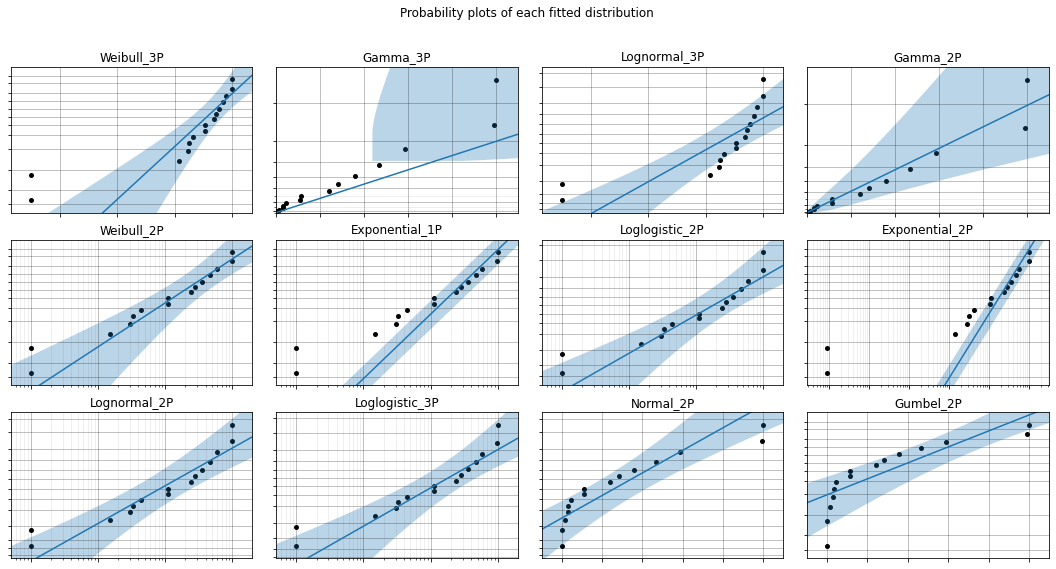

In [380]:
results_placebo = Fit_Everything(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values,
                        show_best_distribution_probability_plot=False)

Given the plots, it seems that 2-parameter Weibull distribution fits data the best. The 2-parameter Gamma distribution also might be an OK candidate for the best model.

Results from Fit_Gamma_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Failures / Right censored: 15/5 (25% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         676.421         334.012    256.98   1780.47
     Beta        0.568223        0.159692  0.327566  0.985686 

Goodness of fit    Value
 Log-likelihood -100.373
           AICc  205.451
            BIC  206.737
             AD  1.93716 

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Failures / Right censored: 15/5 (25% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         342.529         137.161   156.259   750.843
     Beta        0.682327         0.14637  0.448121   1.03894 

Goodness of fit    Value
 Log-likelihood -100.835
           AICc  206.375
            BIC  207.661
             AD  1.87121 



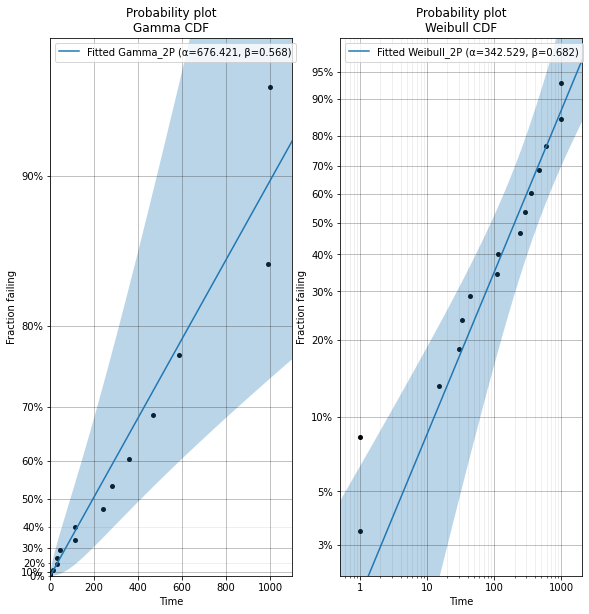

In [297]:
from reliability.Fitters import Fit_Weibull_2P
from reliability.Fitters import Fit_Gamma_2P
from reliability.Other_functions import make_right_censored_data, histogram

plt.figure(figsize=(10,5))
plt.subplot(121)
plac_pm_G = Fit_Gamma_2P(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values)
plt.subplot(122)
plac_pm_W = Fit_Weibull_2P(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values)

We can also compare the survival function, cummulative distribution function and cummulative hazard function with the Kaplan-Meier and Nelson-Aalen estimate and decide which distribution better seems to fit the nonparametric estimation.

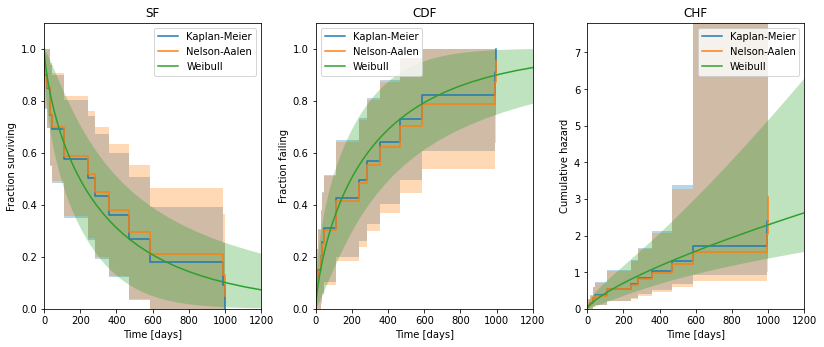

In [381]:
from reliability.Nonparametric import KaplanMeier, NelsonAalen

plt.figure(figsize=(12, 5))
plt.subplot(131)
KaplanMeier(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, plot_type='SF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, label='Nelson-Aalen', print_results=False, plot_type='SF')
dist_W_plac.SF(label='Weibull')
plt.xlabel('Time [days]')
plt.xlim(0,1200)
plt.legend()
plt.title('SF')
plt.subplot(132)
KaplanMeier(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, plot_type='CDF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, label='Nelson-Aalen', print_results=False, plot_type='CDF')
dist_W_plac.CDF(label='Weibull')
plt.xlabel('Time [days]')
plt.xlim(0,1200)
plt.legend()
plt.title('CDF')
plt.subplot(133)
KaplanMeier(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, plot_type='CHF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, label='Nelson-Aalen', print_results=False, plot_type='CHF')
dist_W_plac.CHF(label='Weibull')
plt.xlabel('Time [days]')
plt.xlim(0,1200)
plt.legend()
plt.title('CHF')
plt.subplots_adjust(left=0.07, right=0.95, top=0.92, wspace=0.25)  # format the plot layout
plt.show()

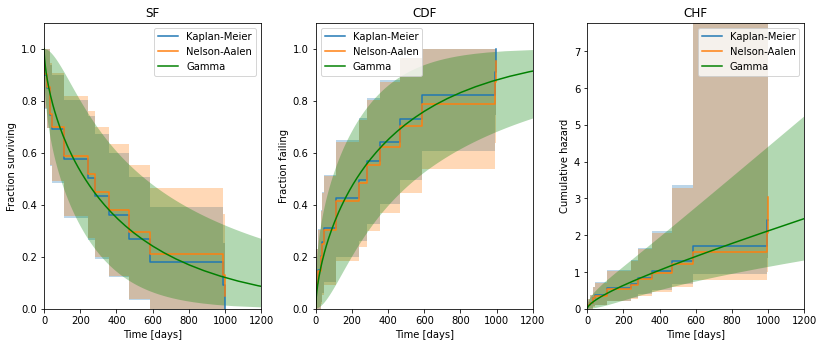

In [299]:
plt.figure(figsize=(12, 5))
plt.subplot(131)
KaplanMeier(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, plot_type='SF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, label='Nelson-Aalen', print_results=False, plot_type='SF')
dist_G.SF(label='Gamma', color='green')
plt.xlabel('Time [days]')
plt.xlim(0,1200)
plt.legend()
plt.title('SF')
plt.subplot(132)
KaplanMeier(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, plot_type='CDF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, label='Nelson-Aalen', print_results=False, plot_type='CDF')
dist_G.CDF(label='Gamma', color='green')
plt.xlabel('Time [days]')
plt.xlim(0,1200)
plt.legend()
plt.title('CDF')
plt.subplot(133)
KaplanMeier(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, plot_type='CHF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, label='Nelson-Aalen', print_results=False, plot_type='CHF')
dist_G.CHF(label='Gamma', color='green')
plt.xlabel('Time [days]')
plt.xlim(0,1200)
plt.legend()
plt.title('CHF')
plt.subplots_adjust(left=0.07, right=0.95, top=0.92, wspace=0.25)  # format the plot layout
plt.show()

We can see that both distribution seem to follow the trend set by KM and NA estimate. However, the Gamma distribution seems to better fit to KM estimate. Therefore, we choose the Gamma model for the placebo group.

# Comparison drug vs placebo

The next task is to compare both groups - patients treated with a drug and patients given placebo treatment.

## Survival function

### Parametric estimation

Text(0.5, 1.0, 'Drug vs Placebo Survival Function')

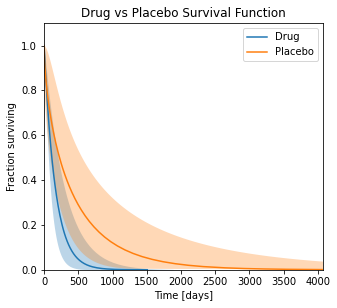

In [383]:
plt.figure(figsize=(5, 5))
dist_E.SF(label='Drug')
dist_G.SF(label='Placebo')
plt.legend()
plt.xlabel('Time [days]')
plt.title('Drug vs Placebo Survival Function')

### Non-parametric estimation

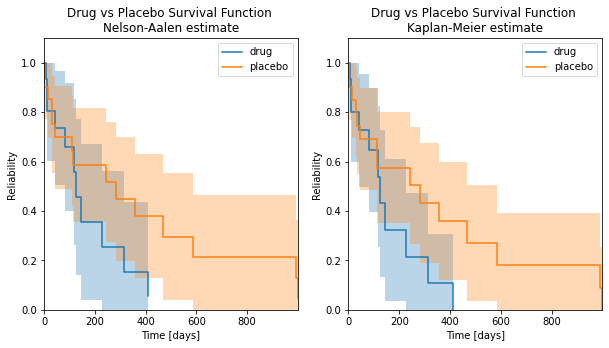

In [301]:
plt.figure(figsize=(10, 5))

plt.subplot(121)

NelsonAalen(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, label='drug', print_results=False, plot_type='SF')
NelsonAalen(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, label='placebo', print_results=False, plot_type='SF')
plt.title('Drug vs Placebo Survival Function \nNelson-Aalen estimate')
plt.xlabel('Time [days]')
plt.legend()

plt.subplot(122)
KaplanMeier(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, plot_type='SF', print_results=False, label='drug')
KaplanMeier(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, plot_type='SF', print_results=False, label='placebo')
plt.title('Drug vs Placebo Survival Function \nKaplan-Meier estimate')
plt.xlabel('Time [days]')
plt.legend()

## Hazard rate & cummulative hazard rate

### Hazard function

We can only calculate hazard function for the parametric models. We can see that the drug group with Exponential model has constant failure rate, but the placebo group has a decreasing failure rate.

Text(0.5, 1.0, 'Drug vs Placebo Hazard Function')

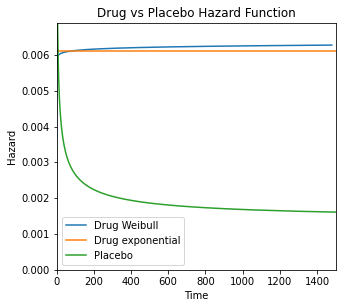

In [389]:
plt.figure(figsize=(5, 5))
dist_W.HF(label='Drug Weibull')
dist_E.HF(label='Drug exponential')
dist_G.HF(label='Placebo')
plt.legend()
plt.xlim(0,1500)
plt.xlabel('Time')
plt.title('Drug vs Placebo Hazard Function')

### Cummulative hazard function

Text(0.5, 1.0, 'Drug vs Placebo Cummulative Hazard Function')

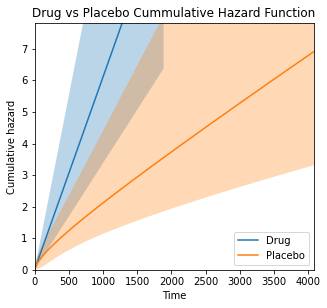

In [390]:
plt.figure(figsize=(5, 5))
#dist_W.CHF(label='Drug')
dist_E.CHF(label='Drug')
dist_G.CHF(label='Placebo')
plt.legend()
plt.xlabel('Time')
plt.title('Drug vs Placebo Cummulative Hazard Function')

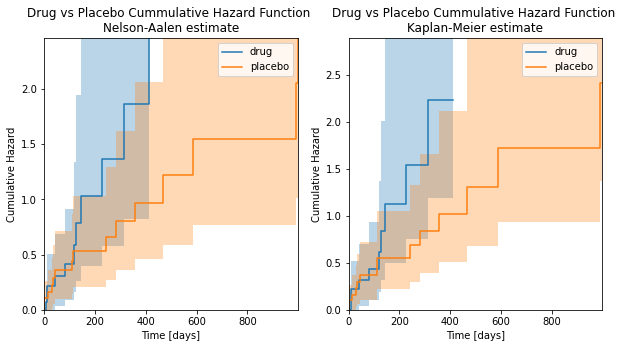

In [483]:
plt.figure(figsize=(10, 5))

plt.subplot(121)

NelsonAalen(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, label='drug', print_results=False, plot_type='CHF')
NelsonAalen(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, label='placebo', print_results=False, plot_type='CHF')
plt.title('Drug vs Placebo Cummulative Hazard Function \nNelson-Aalen estimate')
plt.xlabel('Time [days]')
plt.legend()

plt.subplot(122)
KaplanMeier(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, plot_type='CHF', print_results=False, label='drug')
KaplanMeier(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, plot_type='CHF', print_results=False, label='placebo')
plt.title('Drug vs Placebo Cummulative Hazard Function \nKaplan-Meier estimate')
plt.xlabel('Time [days]')
plt.legend()

## Other characteristics

The last thing is to compute MTTF, median survival time and MRL.

### Parametric models

In [458]:
dist_E.stats()
print('\n------------------------------------------------------------- \n')
dist_W.stats()

Descriptive statistics for Exponential distribution with lambda = 0.006107717940878859
Mean =  163.7272725557636
Median = 113.48709735279724
Mode = 0.0
5th quantile = 8.398111190473506
95th quantile = 490.4830744562714
Standard deviation = 163.7272725557636
Variance = 26806.6197785493
Skewness = 2.0
Excess kurtosis = 6.0

------------------------------------------------------------- 

Descriptive statistics for Weibull distribution with alpha = 163.87280487357805 and beta = 1.0090757661422678
Mean =  163.25511523134548
Median = 113.96302958051938
Mode = 1.5376899537623032
5th quantile = 8.633151708239458
95th quantile = 486.0983556220633
Standard deviation = 161.78867894332535
Variance = 26175.576634226407
Skewness = 1.9730874605055115
Excess kurtosis = 5.821962383198308


In [459]:
dist_G.stats()
print('\n------------------------------------------------------------- \n')
dist_W_plac.stats()

Descriptive statistics for Gamma distribution with alpha = 707.3642051302509 and beta = 0.6040309602835683
Mean =  427.2698800950484
Median = 225.89177440541502
Mode = 0.0
5th quantile = 4.1374275670704925
95th quantile = 1533.763614910811
Standard deviation = 549.7594193004168
Variance = 302235.4191095315
Skewness = 2.573359110537443
Excess kurtosis = 9.93326566767909

------------------------------------------------------------- 

Descriptive statistics for Weibull distribution with alpha = 324.1526675153024 and beta = 0.7364629860734752
Mean =  391.9011617176488
Median = 197.0678626423329
Mode = 0.0
5th quantile = 5.7440253877176835
95th quantile = 1438.0207141886503
Standard deviation = 541.0701886756461
Variance = 292756.9490734993
Skewness = 3.215417843971876
Excess kurtosis = 17.06564693049931


In [465]:
MRLdE = dist_E.mean_residual_life(90).round(2)
MRLdW = dist_W.mean_residual_life(90).round(2)
MRLpG = dist_G.mean_residual_life(90).round(2)
MRLpW = dist_W_plac.mean_residual_life(90).round(2)
print('Mean residual life for t = 90 days:\n--------------------------------\nDrug group:\nExponential: MRL = ', MRLdE, '\nWeibull: MRL = ', MRLdW)
print('--------------------------------\nPlacebo group:\Gamma: MRL = ', MRLpG, '\nWeibull: MRL = ', MRLpW)

Mean residual life for t = 90 days:
--------------------------------
Drug group:
Exponential: MRL =  163.73 
Weibull: MRL =  162.01
--------------------------------
Placebo group:\Gamma: MRL =  512.1 
Weibull: MRL =  471.61


### Non-parametric models

It is also possible to calculate the characteristics we want from the non-parametric models. First, let's save the non-parametric models.

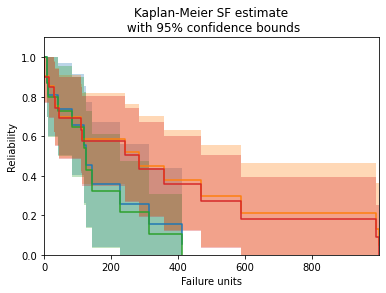

In [448]:
NA_drug = NelsonAalen(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, print_results=False)
NA_placebo = NelsonAalen(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values,print_results=False)

KM_drug = KaplanMeier(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, print_results=False)
KM_placebo = KaplanMeier(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, print_results=False)

To calculate the MTTF (mean time to failure), we need to calculate the area under the survival function.

In [453]:
import numpy as np
from scipy.integrate import simps
from numpy import trapz
from sklearn.metrics import auc

yna_drug = NA_drug.SF
xna_drug = NA_drug.xvals

ykm_drug = KM_drug.SF
xkm_drug = KM_drug.xvals

AUCkmd = auc(xkm_drug, ykm_drug)
AUCnad = auc(xna_drug, yna_drug)

yna_plac = NA_placebo.SF
xna_plac = NA_placebo.xvals

ykm_plac = KM_placebo.SF
xkm_plac = KM_placebo.xvals

AUCkmp = auc(xkm_plac, ykm_plac)
AUCnap = auc(xna_plac, yna_plac)

print('---------------------------------\nMTTF for patient treated with a drug:\nKaplan-Meier = ', AUCkmd, '\nNelson-Aalen = ', AUCnad)
print('---------------------------------\nMTTF for patient treated with a placebo:\nKaplan-Meier = ', AUCkmp, '\nNelson-Aalen = ', AUCnap)

---------------------------------
MTTF for patient treated with a drug:
Kaplan-Meier =  156.0989898989899 
Nelson-Aalen =  168.39923685631663
---------------------------------
MTTF for patient treated with a placebo:
Kaplan-Meier =  356.5517578124999 
Nelson-Aalen =  379.30132586888885


We can also calculate the median survival time $t_{med}$:

In [519]:
kmf_drug = KaplanMeierFitter()
kmf_drug.fit(drug.survt, event_observed=drug.cens)
print('Kaplan_Meier')
print('---------------------------------\npatients treated with a drug:\nt_med = ',kmf_drug.median_survival_time_)

kmf_placebo = KaplanMeierFitter()
kmf_placebo.fit(placebo.survt, event_observed=placebo.cens)
print('---------------------------------\npatients treated with a placebo:\nt_med = ',kmf_placebo.median_survival_time_)

#kmf_drug.cumulative_density_at_times(90)
#kmf_drug.conditional_time_to_event_(1)

Kaplan_Meier
---------------------------------
patients treated with a drug:
t_med =  126.0
---------------------------------
patients treated with a placebo:
t_med =  283.0


In [478]:
na_drug = NelsonAalenFitter()
na_drug.fit(drug.survt, event_observed=drug.cens)
print('Nelson-Aalen')
#print('---------------------------------\npatients treated with a drug:\nt_med = ',na_drug.conditional_time_to_event_(5))

na_placebo = NelsonAalenFitter()
na_placebo.fit(placebo.survt, event_observed=placebo.cens)
#print('---------------------------------\npatients treated with a placebo:\nt_med = ',na_placebo.median_survival_time_)

Nelson-Aalen


<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 20 total observations, 5 right-censored observations>

The median survival times for Nelson-Aalen model need to be obtained from the plot since the methods are not implemented (they are only implemented for KM model).

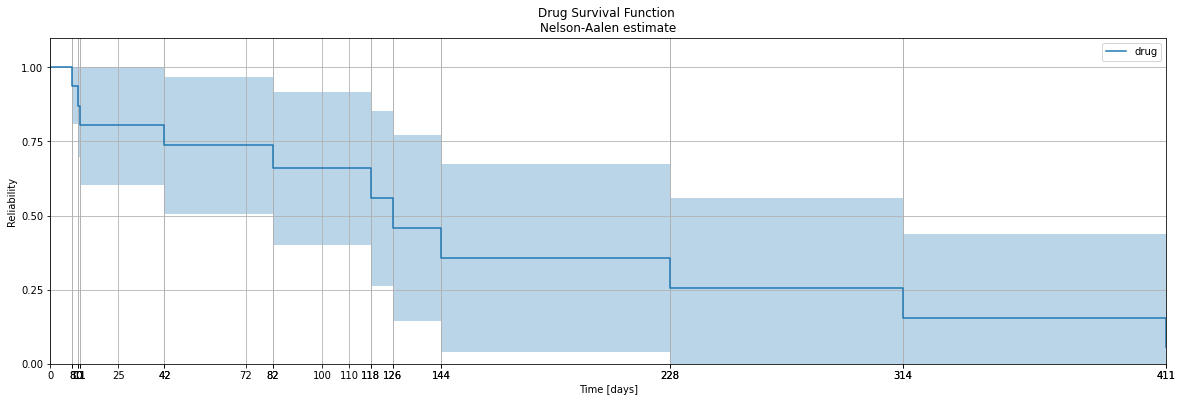

In [500]:
plt.figure(figsize=(20,6))

NAd = NelsonAalen(failures=drug.query('cens==1').survt.values, right_censored=drug.query('cens==0').survt.values, label='drug', print_results=False, plot_type='SF')
plt.title('Drug Survival Function \nNelson-Aalen estimate')
plt.xlabel('Time [days]')
plt.yticks([0,0.25,0.5,0.75,1])
plt.xticks(NAd.xvals)
plt.xlim(0,411)
plt.grid()
plt.legend()

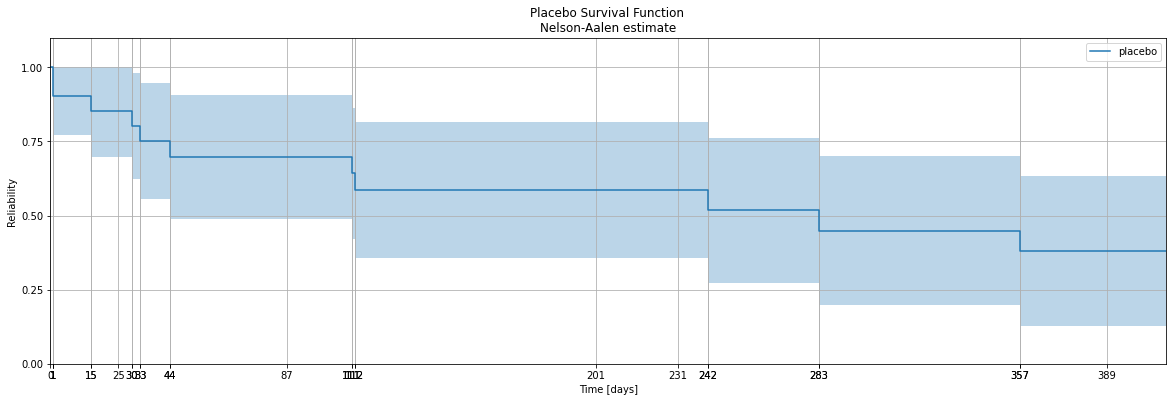

In [501]:
plt.figure(figsize=(20,6))

NAp = NelsonAalen(failures=placebo.query('cens==1').survt.values, right_censored=placebo.query('cens==0').survt.values, label='placebo', print_results=False, plot_type='SF')
plt.title('Placebo Survival Function \nNelson-Aalen estimate')
plt.xlabel('Time [days]')
plt.yticks([0,0.25,0.5,0.75,1])
plt.xticks(NAp.xvals)
plt.xlim(0,411)
plt.grid()
plt.legend()

# Cox model

Until now we have only taken two variables into account: survival time and whether or not the datapoint was censored. We did this for two groups of patients (drug vs placebo) within `cell=1`. The Cox model, if appropriate, allows us to add more explanatory variables and create a regression model for censored data.

Before we can fit the Cox model, we should test whether or not the generating processes are statistically different. We are basically testing the hypothesis
$$H_0: h_1(t) = h_2(t) \quad \text{vs} \quad H_1: h_1(t) = c \cdot h_2(t), \; c \neq 0 $$
for the two groups (drug vs placebo).

First, let's look at the log-log $\hat{R}_{KM}$ plot. Unfortunately, the plots do not seem to be parallel to each other.

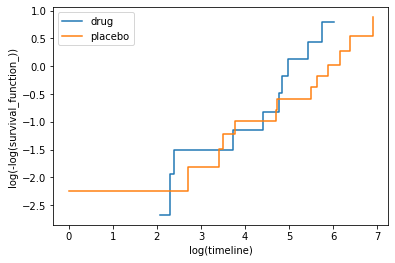

In [530]:

kmf_drug.plot_loglogs(label='drug')
kmf_placebo.plot_loglogs(label='placebo')
plt.legend(['drug','placebo'])

We can also do the Log-Rank test.

In [531]:
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test

LR_test = logrank_test(drug.survt.values, placebo.survt.values, event_observed_A=drug.cens.values, event_observed_B=placebo.cens.values)
LR_test.print_summary()
print(LR_test.p_value)
# print(LR_test.test_statistic)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.41 0.12      3.05

0.12068678778267235


The obtained p-value is 0.12 meaning that at the significance level $\alpha = 0.05$ we would not reject the null hypothesis. Still, we can try what the outcome of the model will be and see what the results might look like. First, let's prepare data.

In [358]:
cox_data = group.loc[:,['treat','survt', 'cens', 'KAR', 'didur', 'age', 'prith']]
cox_data.head()

,treat,survt,cens,KAR,didur,age,prith
0,1,72,0,60,7,69,0
1,1,411,1,70,5,64,10
2,1,228,1,60,3,38,0
3,1,126,1,60,9,63,10
4,1,118,1,70,11,65,10


Using the package `lifelines` we can fit the Cox PH model and also check the assumptions. It seems tha tproportional hazard assumption looks okay.

In [534]:
cph = CoxPHFitter()
cph.fit(cox_data, duration_col='survt', event_col='cens', show_progress=True, step_size=0.1)
cph.check_assumptions(cox_data)

Iteration 1: norm_delta = 0.95286, step_size = 0.1000, log_lik = -66.56188, newton_decrement = 7.27270, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.81703, step_size = 0.1000, log_lik = -65.18101, newton_decrement = 5.65612, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.71026, step_size = 0.1000, log_lik = -64.10687, newton_decrement = 4.45014, seconds_since_start = 0.1
Iteration 4: norm_delta = 0.59918, step_size = 0.1300, log_lik = -63.02567, newton_decrement = 3.28086, seconds_since_start = 0.1
Iteration 5: norm_delta = 0.48727, step_size = 0.1690, log_lik = -62.01103, newton_decrement = 2.22305, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.37745, step_size = 0.2197, log_lik = -61.14181, newton_decrement = 1.34475, seconds_since_start = 0.1
Iteration 7: norm_delta = 0.27241, step_size = 0.2856, log_lik = -60.48320, newton_decrement = 0.69336, seconds_since_start = 0.1
Iteration 8: norm_delta = 0.17599, step_size = 0.3713, log_lik = -60.06340, newton_decreme

[]

In [548]:
#cph = CoxPHFitter()
#cph.fit(cox_data, duration_col='survt', event_col='cens', strata='treat', show_progress=True, step_size=0.1)
#cph.check_assumptions(cox_data)

Now, we can look at the results. 

In [549]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 35 total observations, 9 right-censored observations>
             duration col = 'survt'
                event col = 'cens'
      baseline estimation = breslow
   number of observations = 35
number of events observed = 26
   partial log-likelihood = -59.78
         time fit was run = 2021-07-14 14:58:11 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
treat      -0.21       0.81       0.45            -1.09             0.68                 0.34                 1.97
KAR        -0.04       0.96       0.01            -0.07            -0.01                 0.94                 0.99
didur       0.02       1.02       0.02            -0.03             0.06                 0.97                 1.06
age         0.01       1.01       0.02            -0.04             0.06                 0.96                 1.06
prith       0.01       1.01       0.05            -0.08             0.10                 0.92                 1.10

              z      p   -log2(p)
covariate                        
treat     -0.46   0.64       0.63
KAR       -3.06 <0.005       8.82
didur      0.77   0.44       1.19
age        0.46   0.65       0.62
prith      0.15   0.88       0.18
---
Concordance = 0.71
Partial AIC = 129.55
log-likelihood ratio test = 13.57 on 5 df
-log2(p) of ll-ratio test = 5.75

<AxesSubplot:xlabel='log(HR) (95% CI)'>

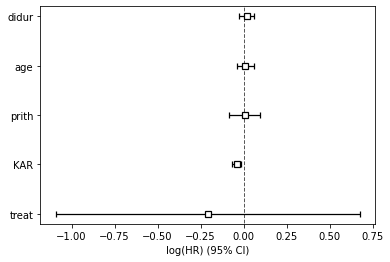

In [547]:
cph.plot()

<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

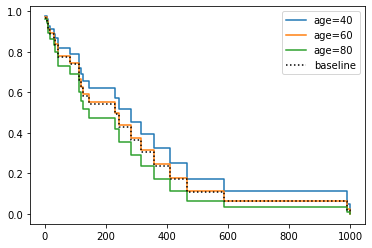

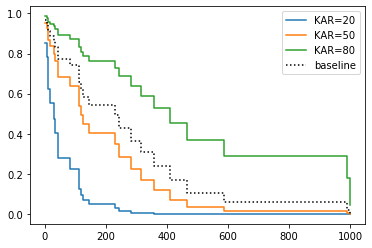

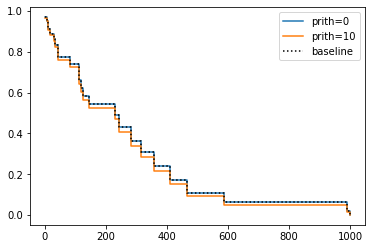

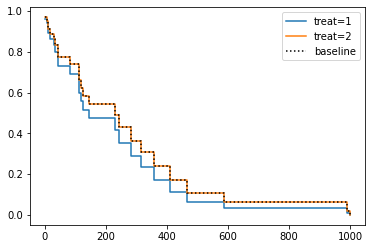

In [552]:
plt.figure(figsize=(10, 5))
cph.plot_partial_effects_on_outcome('age', [40, 60, 80])
cph.plot_partial_effects_on_outcome('KAR', [20, 50, 80])
cph.plot_partial_effects_on_outcome('prith', [0,10])
cph.plot_partial_effects_on_outcome('treat', [1,2])

In [563]:
data_reduced = cox_data.loc[:,['survt', 'cens', 'KAR', 'treat']]
cph2 = CoxPHFitter()
cph2.fit(data_reduced, duration_col='survt', event_col='cens', strata='treat', show_progress=False, step_size=0.1)
cph2.check_assumptions(data_reduced)

Proportional hazard assumption looks okay.
c:\Users\masen\Desktop\fjfi_projects\2020-2021\SKE\ske\lib\site-packages\lifelines\fitters\mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


[]

In [564]:
cph2.print_summary()

<lifelines.CoxPHFitter: fitted with 35 total observations, 9 right-censored observations>
             duration col = 'survt'
                event col = 'cens'
                   strata = treat
      baseline estimation = breslow
   number of observations = 35
number of events observed = 26
   partial log-likelihood = -44.94
         time fit was run = 2021-07-15 06:44:17 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
KAR        -0.04       0.96       0.01            -0.07            -0.02                 0.94                 0.99

              z      p   -log2(p)
covariate                        
KAR       -3.13 <0.005       9.16
---
Concordance = 0.72
Partial AIC = 91.88
log-likelihood ratio test = 9.95 on 1 df
-log2(p) of ll-ratio test = 9.28

[<AxesSubplot:>, <AxesSubplot:>]

<Figure size 720x360 with 0 Axes>

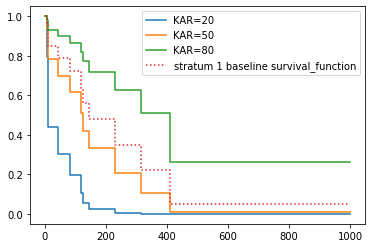

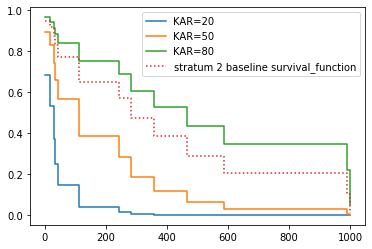

In [566]:
plt.figure(figsize=(10, 5))
cph2.plot_partial_effects_on_outcome('KAR', [20, 50, 80])